In [10]:
import sys
sys.path.append('../')
# from experiments import utilities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pypolo2

# Average pm2.5 concentration for different team size

In [11]:
#区域平均污染物浓度
Setting = pypolo2.utilities.Config()
strategy_name = ["EffectOrientedSelectiveSpray",
                 "EffectOrientedMCTSSpray",
                 "MaximumCoverageSpray",
                 "NoSpray"]
comparing_variables = [["teamsize_1","teamsize_2","teamsize_3","teamsize_4","teamsize_5"]]
seeds = [7,11,18,20,25,36,42,50,60,72,80,85]
team_sizes = [1,2,3,4,5]
sourcenums = [1,2,3,4,5]
change_intervals = [4,8,12]
total_step = 48
sche_step = 0
adaptive_step = 0
strategy_pm25concentration = []
for strategy in strategy_name:
    if strategy == "EffectOrientedMCTSSpray":
        sche_step = 8
        adaptive_step = 8
    else:
        sche_step = 18
        adaptive_step = 3
    variable_pm25concentration = []
    for i in range(5):
        comparing_variable = comparing_variables[0][i]
        team_size = team_sizes[i]
        sourcenum = 3
        seed_pm25concentration = []
        for seed in seeds:
            pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
            pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
            data = pypolo2.experiments.utilities.readpkl(pkldir)
            time_pm25concentration = []
            for j in range(total_step):
                if j > 24:
                    pm25concentration = np.mean(data['truth_env'][j])
                    time_pm25concentration.append(pm25concentration)
            seed_pm25concentration.append(np.mean(time_pm25concentration))
        variable_pm25concentration.append(np.mean(seed_pm25concentration))
    strategy_pm25concentration.append(variable_pm25concentration)
strategy_pm25concentration = np.array(strategy_pm25concentration)
strategy_pm25concentration[-1,:] = np.mean(strategy_pm25concentration[-1,:])
print(strategy_pm25concentration)


[[ 66.55566988  45.1195746   33.68577556  31.73618554  29.402832  ]
 [ 65.18454212  52.08889026  44.0666013   41.29805632  41.85575201]
 [ 82.25031744  69.80216118  53.71318959  46.38575663  43.29620551]
 [111.51430073 111.51430073 111.51430073 111.51430073 111.51430073]]


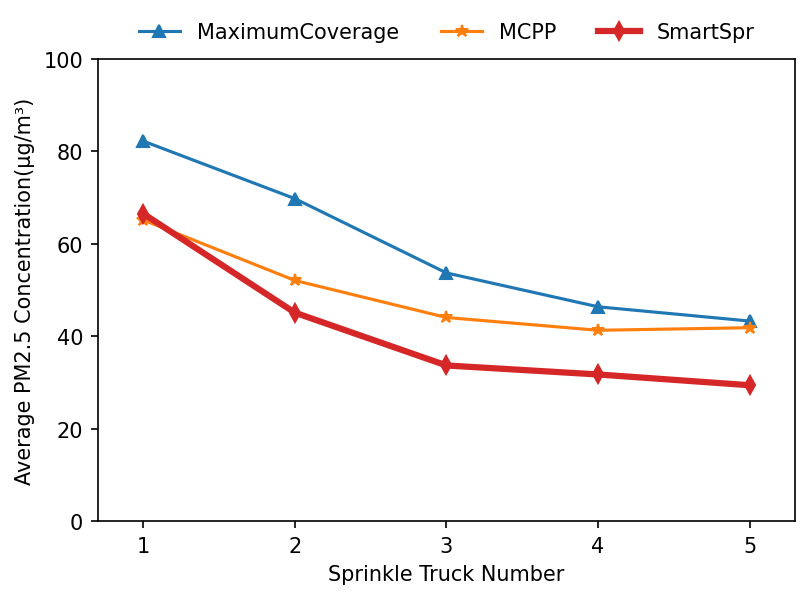

In [12]:
Time_deadline = 5
xtitle = 'Sprinkle Truck Number'
ytitle = 'Average PM2.5 Concentration(μg/m³)'
filename = './outputs/png/line_AverageConcentration-teamszize12345-linetype.png'
colors_dict = ['#d62728', '#ff7f0e', '#1f77b4']
ncol = 3
x_values = range(1, Time_deadline + 1)

plt.figure(figsize =(6,4),dpi=150)

plt.plot(x_values, strategy_pm25concentration[2][0:Time_deadline], marker='^', color=colors_dict[2], label='MaximumCoverage')
plt.plot(x_values, strategy_pm25concentration[1][0:Time_deadline], marker='*', color=colors_dict[1], label='MCPP')
plt.plot(x_values, strategy_pm25concentration[0][0:Time_deadline], marker='d', color=colors_dict[0], linewidth=3, label='SmartSpr')

plt.xlabel(xtitle)
plt.ylabel(ytitle)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=ncol, frameon=False)

plt.xlim([1-0.3, Time_deadline+0.3])
plt.ylim([0, 100])

plt.savefig(filename,bbox_inches = 'tight')

# Average suppression of pm2.5 concentration for diff team size

In [13]:
# 区域pm2.5平均浓度变化
Setting = pypolo2.utilities.Config()
strategy_name = ["EffectOrientedSelectiveSpray",
                 "EffectOrientedMCTSSpray",
                 "MaximumCoverageSpray",
                 "NoSpray"]
comparing_variables = [["teamsize_1","teamsize_2","teamsize_3","teamsize_4","teamsize_5"]]
seeds = [7,11,18,20,25,36,42,50,60,72,80,85]
team_sizes = [1,2,3,4,5]
sourcenums = [1,2,3,4,5]
change_intervals = [4,8,12]
total_step = 48
sche_step = 0
adaptive_step = 0
strategy_pm25suppression = []
for strategy in strategy_name:
    if strategy == "EffectOrientedMCTSSpray":
        sche_step = 8
        adaptive_step = 8
    else:
        sche_step = 18
        adaptive_step = 3
    variable_pm25suppression = []
    for i in range(5):
        comparing_variable = comparing_variables[0][i]
        team_size = team_sizes[i]
        sourcenum = 3
        seed_pm25suppression = []
        for seed in seeds:
            pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
            pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
            data = pypolo2.experiments.utilities.readpkl(pkldir)
            effect = np.sum(data['spray_effect'])/48/400
            seed_pm25suppression.append(effect)
        variable_pm25suppression.append(np.mean(seed_pm25suppression))
    strategy_pm25suppression.append(variable_pm25suppression)
strategy_pm25suppression = np.array(strategy_pm25suppression)
print(strategy_pm25suppression)

[[ 2.13372906e+00  2.88937756e+00  3.34873413e+00  3.55035675e+00
   3.62547667e+00]
 [ 2.00403503e+00  2.59227764e+00  2.96602910e+00  3.08583053e+00
   3.02348285e+00]
 [ 1.12798491e+00  1.79956894e+00  2.49675493e+00  2.77341230e+00
   2.92525131e+00]
 [-1.62306166e-04 -2.21594112e-05 -7.49055096e-05  5.22921695e-06
   6.06123337e-05]]


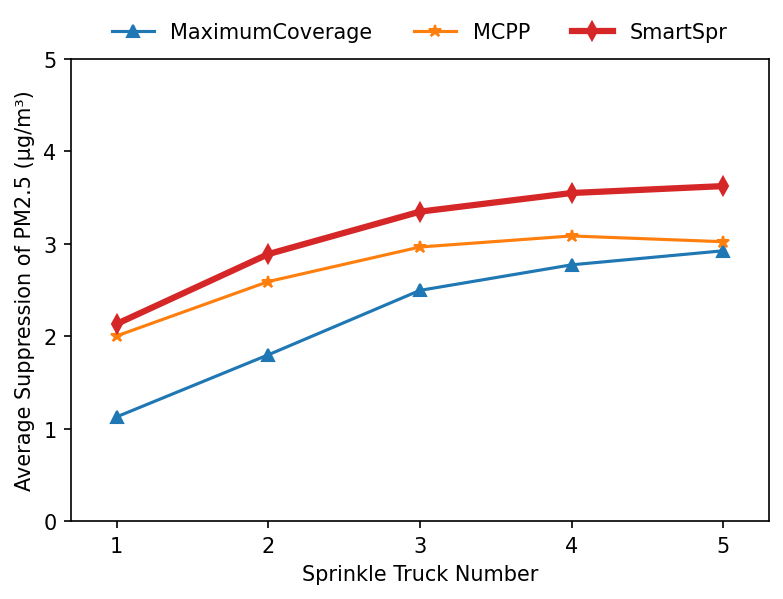

In [14]:
Time_deadline = 5
xtitle = 'Sprinkle Truck Number'
ytitle = 'Average Suppression of PM2.5 (μg/m³)'
filename = './outputs/png/line_AverageSuppression-teamsize12345-linetype.png'
colors_dict = ['#d62728', '#ff7f0e', '#1f77b4']
ncol = 3
x_values = range(1, Time_deadline + 1)

plt.figure(figsize =(6,4),dpi=150)

plt.plot(x_values, strategy_pm25suppression[2][0:Time_deadline], marker='^', color=colors_dict[2], label='MaximumCoverage')
plt.plot(x_values, strategy_pm25suppression[1][0:Time_deadline], marker='*', color=colors_dict[1], label='MCPP')
plt.plot(x_values, strategy_pm25suppression[0][0:Time_deadline], marker='d', color=colors_dict[0], linewidth=3, label='SmartSpr')

plt.xlabel(xtitle)
plt.ylabel(ytitle)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=ncol, frameon=False)

plt.xlim([1-0.3, Time_deadline+0.3])
plt.ylim([0, 5])

plt.savefig(filename,bbox_inches = 'tight')

# Average pm2.5 concentration for different source number

In [15]:
# 区域pm2.5平均浓度变化
Setting = pypolo2.utilities.Config()
strategy_name = ["EffectOrientedSelectiveSpray",
                 "EffectOrientedMCTSSpray",
                 "MaximumCoverageSpray",
                 "NoSpray"]
comparing_variables = [["teamsize_1","teamsize_2","teamsize_3","teamsize_4","teamsize_5"],
                       ["numsource_1","numsource_2","numsource_3","numsource_4","numsource_5"]]
seeds = [7,11,18,20,25,36,42,50,60,72,80,85]
team_sizes = [1,2,3,4,5]
sourcenums = [1,2,3,4,5]
strategy_meanpm = []
sche_step = 0
adaptive_step = 0
strategy_pm25concentration = []
for strategy in strategy_name:
    if strategy == "EffectOrientedMCTSSpray":
        sche_step = 8
        adaptive_step = 8
    else:
        sche_step = 18
        adaptive_step = 3
    variable_pm25concentration = []
    for i in range(5):
        comparing_variable = comparing_variables[1][i]
        team_size = 3
        sourcenum = sourcenums[i]
        seed_pm25concentration = []
        for seed in seeds:
            pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
            pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
            data = pypolo2.experiments.utilities.readpkl(pkldir)
            time_pm25concentration = []
            for j in range(total_step):
                if j > 24:
                    pm25concentration = np.mean(data['truth_env'][j])
                    time_pm25concentration.append(pm25concentration)
            seed_pm25concentration.append(np.mean(time_pm25concentration))
        variable_pm25concentration.append(np.mean(seed_pm25concentration))
    strategy_pm25concentration.append(variable_pm25concentration)
strategy_pm25concentration = np.array(strategy_pm25concentration)
strategy_pm25concentration[-1,:] = np.mean(strategy_pm25concentration[-1,:])
print(strategy_pm25concentration)



[[ 16.56642212  29.07575059  35.92576136  41.58140233  43.9913761 ]
 [ 21.75183067  32.97128108  43.55128086  53.75019798  60.29991642]
 [ 21.56938725  41.60791695  53.79977588  62.78863684  75.46715359]
 [111.41975255 111.41975255 111.41975255 111.41975255 111.41975255]]


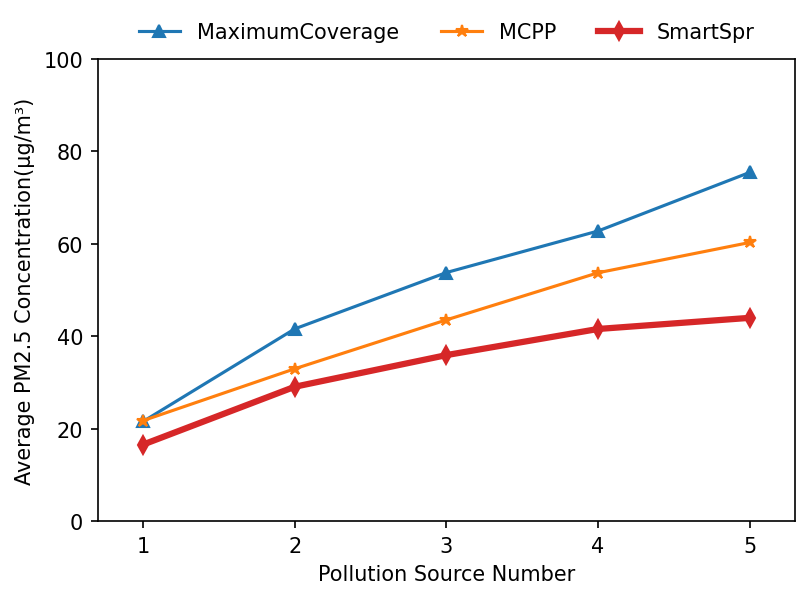

In [16]:
Time_deadline = 5
xtitle = 'Pollution Source Number'
ytitle = 'Average PM2.5 Concentration(μg/m³)'
filename = './outputs/png/line_AverageConcentration-source12345-linetype.png'
colors_dict = ['#d62728', '#ff7f0e', '#1f77b4']
ncol = 3
x_values = range(1, Time_deadline + 1)

plt.figure(figsize =(6,4),dpi=150)

plt.plot(x_values, strategy_pm25concentration[2][0:Time_deadline], marker='^', color=colors_dict[2], label='MaximumCoverage')
plt.plot(x_values, strategy_pm25concentration[1][0:Time_deadline], marker='*', color=colors_dict[1], label='MCPP')
plt.plot(x_values, strategy_pm25concentration[0][0:Time_deadline], marker='d', color=colors_dict[0], linewidth=3, label='SmartSpr')

plt.xlabel(xtitle)
plt.ylabel(ytitle)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=ncol, frameon=False)

plt.xlim([1-0.3, Time_deadline+0.3])
plt.ylim([0, 100])

plt.savefig(filename,bbox_inches = 'tight')

# Average suppression for 12345 source

In [17]:
# 区域pm2.5平均浓度变化
Setting = pypolo2.utilities.Config()
strategy_name = ["EffectOrientedSelectiveSpray",
                 "EffectOrientedMCTSSpray",
                 "MaximumCoverageSpray",
                 "NoSpray"]
comparing_variables = [["teamsize_1","teamsize_2","teamsize_3","teamsize_4","teamsize_5"],
                       ["numsource_1","numsource_2","numsource_3","numsource_4","numsource_5"]]
seeds = [7,11,18,20,25,36,42,50,60,72,80,85]
team_sizes = [1,2,3,4,5]
sourcenums = [1,2,3,4,5]
total_step = 48
sche_step = 0
adaptive_step = 0
strategy_pm25suppression = []
for strategy in strategy_name:
    if strategy == "EffectOrientedMCTSSpray":
        sche_step = 8
        adaptive_step = 8
    else:
        sche_step = 18
        adaptive_step = 3
    variable_pm25suppression = []
    for i in range(5):
        comparing_variable = comparing_variables[1][i]
        team_size = 3
        sourcenum = sourcenums[i]
        seed_pm25suppression = []
        for seed in seeds:
            pklname = f'SEED_{seed}_X{Setting.grid_x}_Y{Setting.grid_y}_VS{team_size}_TS{Setting.max_num_samples}_SS{sche_step}_AS{adaptive_step}_SN{sourcenum}_RS{Setting.replenish_speed}_WV{Setting.water_volume}'
            pkldir = './outputs/' + strategy + '/' + comparing_variable + '/' + pklname + ".pkl"
            data = pypolo2.experiments.utilities.readpkl(pkldir)
            effect = np.sum(data['spray_effect'])/48/400
            seed_pm25suppression.append(effect)
        variable_pm25suppression.append(np.mean(seed_pm25suppression))
    strategy_pm25suppression.append(variable_pm25suppression)
strategy_pm25suppression = np.array(strategy_pm25suppression)
print(strategy_pm25suppression)


[[ 1.15704032e+00  2.24324393e+00  3.27388896e+00  4.53609697e+00
   5.87249341e+00]
 [ 9.45806586e-01  1.89168531e+00  2.98225181e+00  3.99402285e+00
   5.13311479e+00]
 [ 6.73536007e-01  1.53718068e+00  2.51433553e+00  3.35556245e+00
   4.26774644e+00]
 [ 4.51916569e-05  1.26432877e-05  2.29652531e-05 -1.42305929e-04
   4.34710523e-04]]


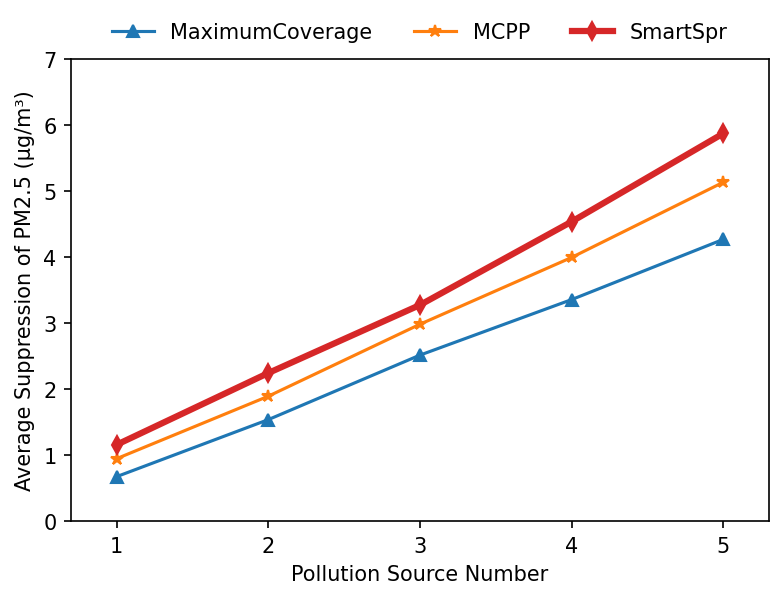

In [21]:
Time_deadline = 5
xtitle = 'Pollution Source Number'
ytitle = 'Average Suppression of PM2.5 (μg/m³)'
filename = './outputs/png/line_AverageSuppression-source12345-linetype.png'
colors_dict = ['#d62728', '#ff7f0e', '#1f77b4']
ncol = 3
x_values = range(1, Time_deadline + 1)

plt.figure(figsize =(6,4),dpi=150)

plt.plot(x_values, strategy_pm25suppression[2][0:Time_deadline], marker='^', color=colors_dict[2], label='MaximumCoverage')
plt.plot(x_values, strategy_pm25suppression[1][0:Time_deadline], marker='*', color=colors_dict[1], label='MCPP')
plt.plot(x_values, strategy_pm25suppression[0][0:Time_deadline], marker='d', color=colors_dict[0], linewidth=3, label='SmartSpr')

plt.xlabel(xtitle)
plt.ylabel(ytitle)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12), ncol=ncol, frameon=False)

plt.xlim([1-0.3, Time_deadline+0.3])
plt.ylim([0, 7])

plt.savefig(filename,bbox_inches = 'tight')